In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('generated_data.csv')

In [3]:
data

,utc_timestamp,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp,folder,client_id,date,time_slot,label
0,1.584751e+09,12.287026,21.003774,57.995350,61.892074,-33.161649,0.122965,71.980037,32.889931,114,1869,2020_03_21,00_40_00,0
1,1.584751e+09,12.535225,21.003774,57.995350,61.941714,-33.208873,0.122965,71.981301,32.889931,114,1869,2020_03_21,00_40_00,0
2,1.584751e+09,12.783424,21.003774,57.995350,61.991353,-32.878305,0.122965,71.981301,32.889931,114,1869,2020_03_21,00_40_00,0
3,1.584751e+09,13.001839,21.003774,57.995350,62.036029,-32.453290,0.122965,71.981301,32.889931,114,1869,2020_03_21,00_40_00,0
4,1.584751e+09,13.001839,21.003774,57.995350,62.036029,-31.744931,0.122965,71.982565,32.889931,114,1869,2020_03_21,00_40_00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534395,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-120.856480,15.840154,71.292309,35.549927,114,1869,2020_03_21,06_00_00,0
2534396,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-126.334455,15.839525,71.292309,35.549927,114,1869,2020_03_21,06_00_00,0
2534397,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-131.859654,15.838896,71.293573,35.549927,114,1869,2020_03_21,06_00_00,0
2534398,1.584771e+09,-48.998265,-39.998570,-14.999969,64.006729,-137.007062,15.838581,71.293573,35.549927,114,1869,2020_03_21,06_00_00,0


In [8]:
data.describe()

,utc_timestamp,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp,folder,client_id,label
count,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2.534400e+06,2534400.0,2534400.0,2534400.0
mean,1.584761e+09,-3.542516e+00,-1.801540e+01,2.128438e+01,6.260613e+01,-1.270002e-02,2.395419e+00,7.268649e+01,3.403360e+01,114.0,1869.0,0.0
std,5.715769e+03,4.028597e+01,2.613772e+01,3.092859e+01,2.675374e+00,6.564692e+01,5.234761e+00,5.747592e+00,7.390353e-01,0.0,0.0,0.0
min,1.584751e+09,-1.279950e+02,-1.279950e+02,-1.279950e+02,6.196223e+00,-1.336117e+03,1.572442e-03,5.562122e+01,3.265997e+01,114.0,1869.0,0.0
25%,1.584756e+09,-4.899827e+01,-4.099633e+01,-8.998518e+00,6.120208e+01,-1.965561e+01,2.613399e-01,6.918994e+01,3.346998e+01,114.0,1869.0,0.0
50%,1.584761e+09,9.000872e+00,-1.799821e+01,2.300426e+01,6.199632e+01,2.539639e+00,2.858700e-01,7.178914e+01,3.388994e+01,114.0,1869.0,0.0
75%,1.584766e+09,3.291733e+01,3.004384e+00,5.299662e+01,6.415068e+01,2.100419e+01,3.682660e-01,7.482071e+01,3.449265e+01,114.0,1869.0,0.0
max,1.584771e+09,1.261458e+02,1.269996e+02,1.245574e+02,1.840904e+02,1.198533e+03,2.061000e+01,1.087292e+02,3.592993e+01,114.0,1869.0,0.0


In [16]:
grouped = data.groupby('time_slot').mean()

/tmp/ipykernel_17287/1022781925.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = data.groupby('time_slot').mean()


In [20]:
grouped.shape

(33, 12)

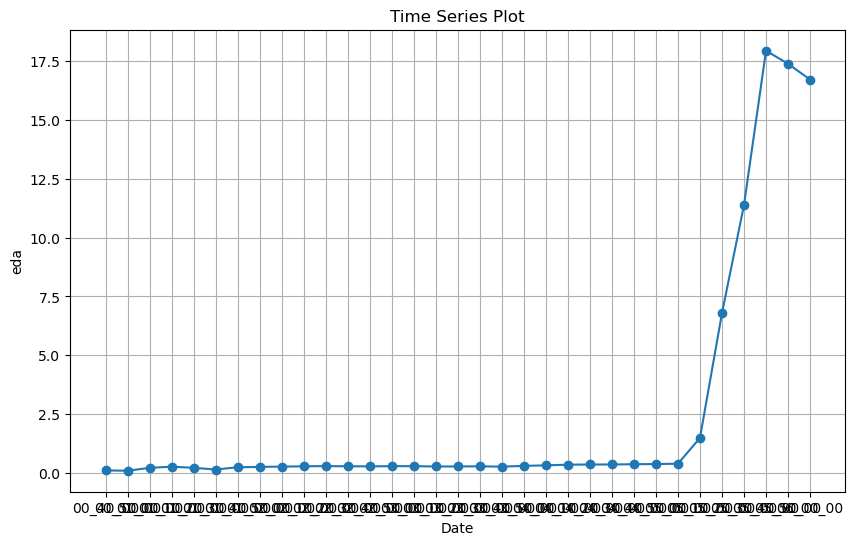

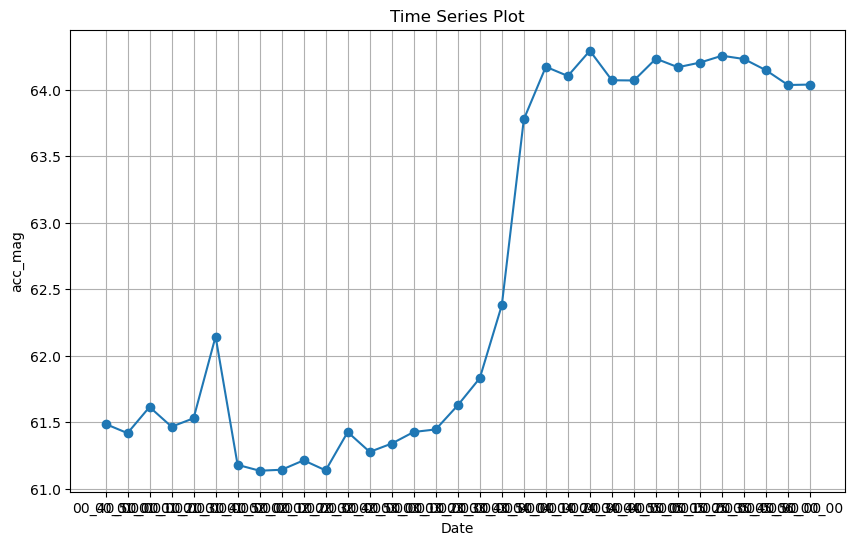

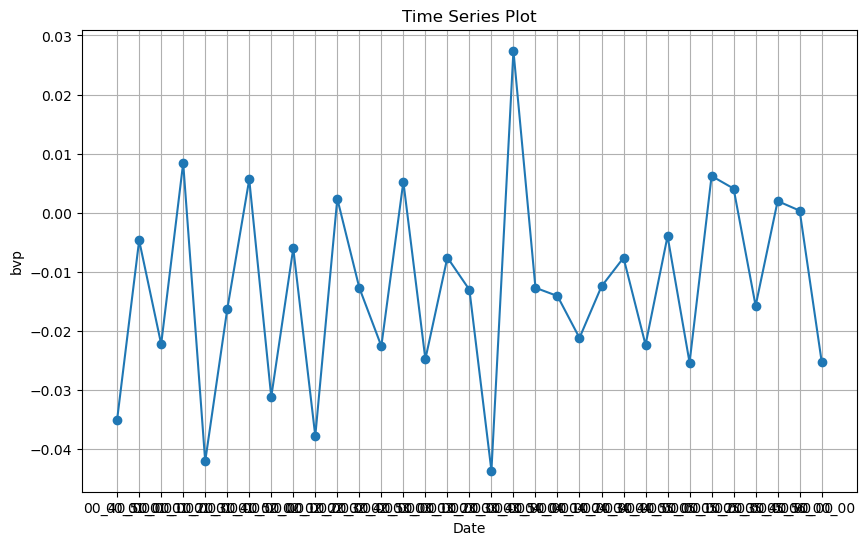

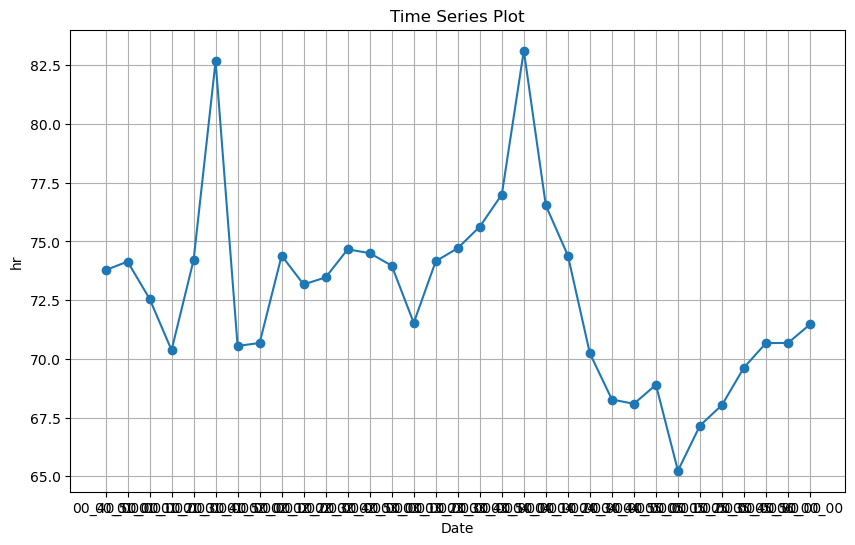

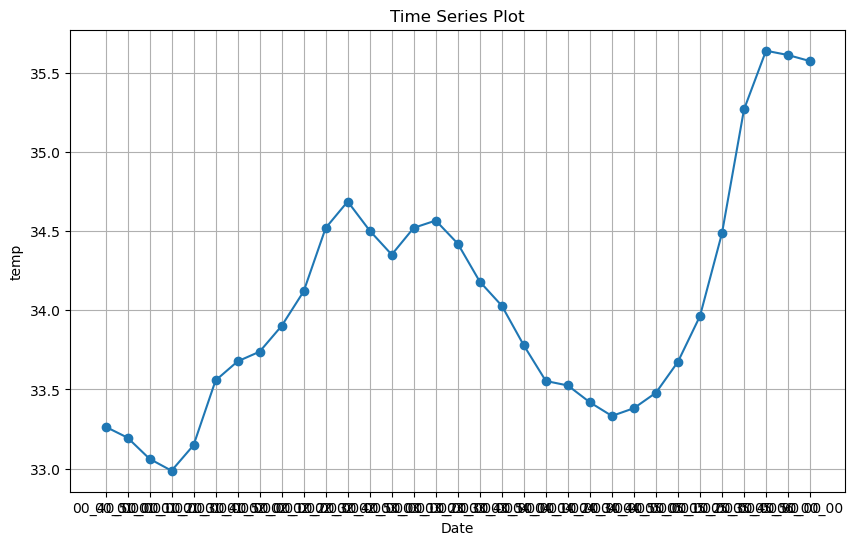

In [22]:
features_to_plot = ['eda','acc_mag','bvp','hr','temp']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot the time series data
    plt.plot(grouped.index, grouped[feature], marker='o', linestyle='-')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title('Time Series Plot')

    # Show the grid
    plt.grid(True)

    # Show the plot
    plt.show()


In [23]:
correlation_matrix = grouped.corr()

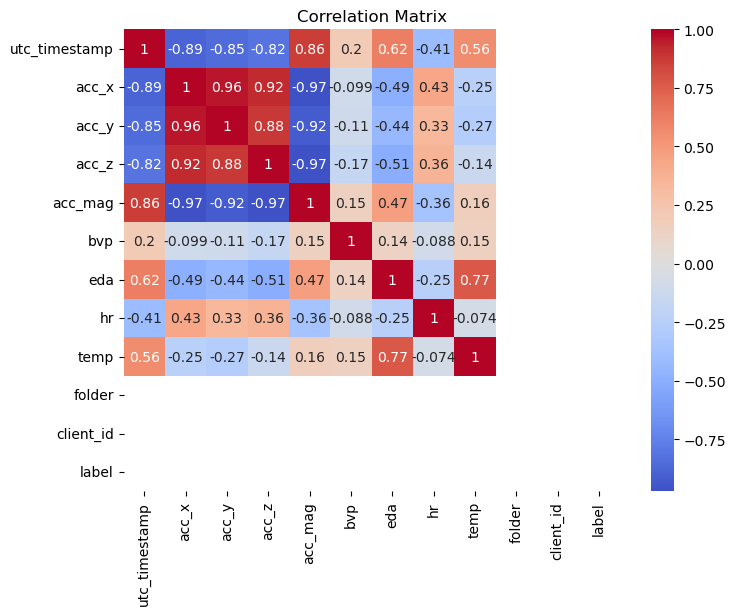

In [26]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

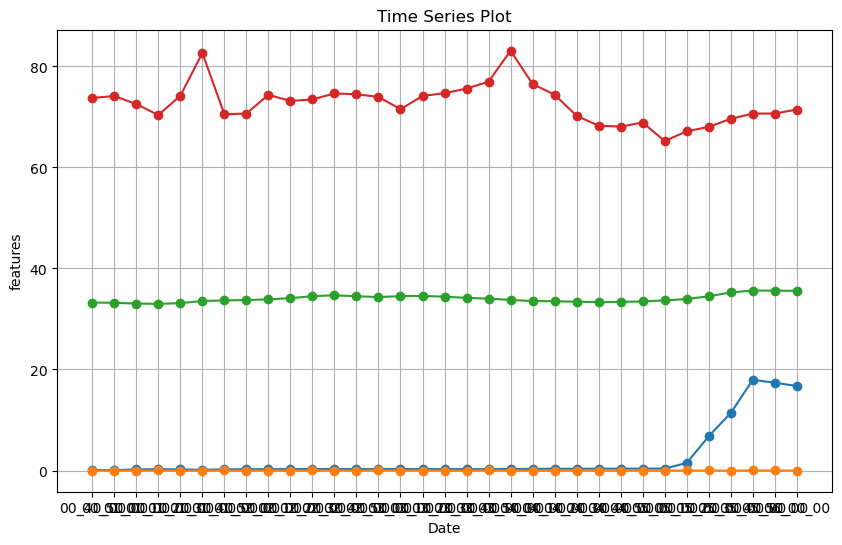

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot multiple features on the same plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the time series data
plt.plot(grouped.index, grouped['eda'], marker='o', linestyle='-')
plt.plot(grouped.index, grouped['bvp'], marker='o', linestyle='-')
plt.plot(grouped.index, grouped['temp'], marker='o', linestyle='-')
plt.plot(grouped.index, grouped['hr'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('features')
plt.title('Time Series Plot')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

